# Katrina Tidal Guages

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
import cartopy
import cartopy.crs as ccrs
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
from sithom.plot import plot_defaults
plot_defaults()
#from sithom.plot import plot_defaults

In [3]:
%matplotlib inline

In [4]:
from src.constants import KATRINA_TIDE_NC, NEW_ORLEANS, KATRINA_ERA5_NC

In [5]:
ds = xr.open_dataset(KATRINA_TIDE_NC)

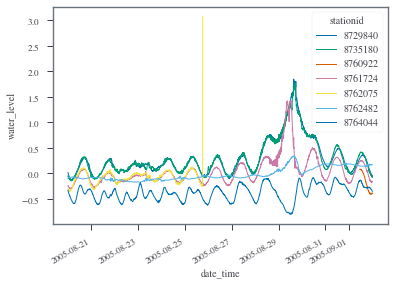

In [6]:
ds.water_level.plot.line(hue="stationid")
plt.show()

In [5]:
?ccrs.PlateCarree

In [6]:
ds["stationid"].values

array(['8729840', '8735180', '8760922', '8761724', '8762075', '8762482',
       '8764044'], dtype=object)

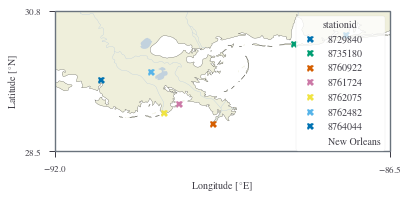

In [8]:
lons = [-92, -86.5]
lats = [28.5, 30.8]

# fig, axs = plt.subplots(2,1)
ax1 = plt.axes(projection=cartopy.crs.PlateCarree())

def plot_guages_map(ax):
    ax.add_feature(cartopy.feature.LAND)
    # ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.add_feature(cartopy.feature.BORDERS, linestyle=":")
    ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
    ax.add_feature(cartopy.feature.RIVERS)
    ax.set_extent(lons + lats)

    for stationid in ds["stationid"].values:
        ax.plot(
            ds.sel(stationid=stationid).lon.values,
            ds.sel(stationid=stationid).lat.values,
            "X",
            label=stationid,
        )

    ax.plot(NEW_ORLEANS[0], NEW_ORLEANS[1], "+", color="black", label="New Orleans")
    ax.set_xticks(lons, crs=ccrs.PlateCarree())
    ax.set_yticks(lats, crs=ccrs.PlateCarree())
    ax.set_ylabel("Latitude [$^{\circ}$N]")
    ax.set_xlabel("Longitude [$^{\circ}$E]")
    plt.legend(title="stationid")
    
plot_guages_map(ax1)
plt.show()

In [8]:
?plt.axes

In [9]:
?plt.legend

In [12]:
era5 = xr.open_dataset(KATRINA_ERA5_NC)

In [155]:
era5.swh

<xarray.DataArray 'swh' (time: 288, latitude: 81, longitude: 81)>
[1889568 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -100.0 -99.75 -99.5 ... -80.5 -80.25 -80.0
  * latitude   (latitude) float32 35.0 34.75 34.5 34.25 ... 15.5 15.25 15.0
  * time       (time) datetime64[ns] 2005-08-20 ... 2005-08-31T23:00:00
Attributes:
    units:      m
    long_name:  Significant height of combined wind waves and swell

In [156]:
era5.v10

<xarray.DataArray 'v10' (time: 288, latitude: 81, longitude: 81)>
[1889568 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -100.0 -99.75 -99.5 ... -80.5 -80.25 -80.0
  * latitude   (latitude) float32 35.0 34.75 34.5 34.25 ... 15.5 15.25 15.0
  * time       (time) datetime64[ns] 2005-08-20 ... 2005-08-31T23:00:00
Attributes:
    units:      m s**-1
    long_name:  10 metre V wind component

In [129]:
era5

<xarray.Dataset>
Dimensions:    (longitude: 81, latitude: 81, time: 288)
Coordinates:
  * longitude  (longitude) float32 -100.0 -99.75 -99.5 ... -80.5 -80.25 -80.0
  * latitude   (latitude) float32 35.0 34.75 34.5 34.25 ... 15.5 15.25 15.0
  * time       (time) datetime64[ns] 2005-08-20 ... 2005-08-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    mwd        (time, latitude, longitude) float32 ...
    mwp        (time, latitude, longitude) float32 ...
    sst        (time, latitude, longitude) float32 ...
    swh        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-05-24 18:12:03 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

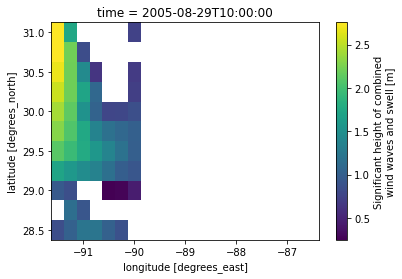

In [150]:
mid_katrina(era5.swh).plot()

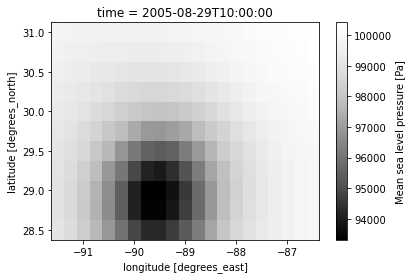

In [132]:
mid_katrina(era5.msl).plot(cmap="Greys_r")

In [9]:
def mid_katrina(xr_obj):
    return xr_obj.sel(longitude=slice(lons[0], lons[1]), latitude=slice(lats[1], lats[0]),  time="2005-08-29T10:00:00")

In [10]:
def add_features(ax):
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
    ax.add_feature(cartopy.feature.RIVERS)

In [11]:

pc = ccrs.PlateCarree()
mid_katrina(era5.tp).plot(cmap="Greys", transform=pc, subplot_kws={'projection': pc})
ax = plt.gca()

ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

NameError: name 'era5' is not defined

In [118]:
lons = [-91.6, -86.5]
lats = [28.5, 31]
lons + lats

[-91.6, -86.5, 28.5, 31]

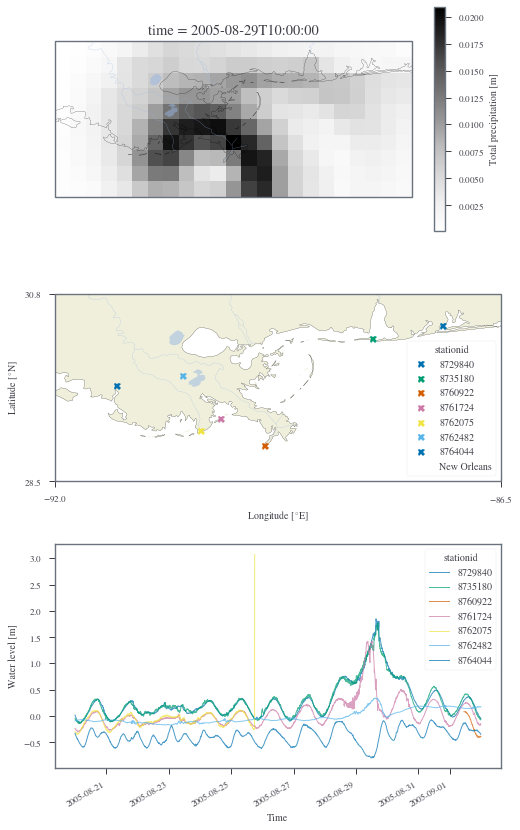

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(8, 14))
gs = fig.add_gridspec(3, 3)

pc = ccrs.PlateCarree()
ax3 = fig.add_subplot(gs[0, :], projection=pc)


def era5_new_orleans(ax_var, variable="tp"):
    mid_katrina(era5[variable]).plot(
        ax=ax3, cmap="Greys", transform=pc
    )  # , #subplot_kws={'projection': pc})
    add_features(ax3)


era5_new_orleans(ax3)

ax1 = fig.add_subplot(gs[1, :], projection=pc)
plot_guages_map(ax1)
# ax1.coastlines(resolution='auto', color='k')
# ax1.gridlines(color='lightgrey', linestyle='-', draw_labels=True)

ax2 = fig.add_subplot(gs[2, :])
# ax2.plot([1, 2], [3, 4])
ds.water_level.attrs["long_name"] = "Water level"
ds.water_level.attrs["units"] = "m"
# ds.water_level.attrs["units"] = "m"
ds["date_time"].attrs["long_name"] = "Time"
ds.water_level.plot.line(ax=ax2, hue="stationid", alpha=0.7)

In [48]:
ds["date_time"].attrs["long_name"] = "Time"

<xarray.Dataset>
Dimensions:      (date_time: 3121, stationid: 7)
Coordinates:
  * date_time    (date_time) datetime64[ns] 2005-08-20 ... 2005-09-02
    name         (stationid) object ...
  * stationid    (stationid) object '8729840' '8735180' ... '8762482' '8764044'
    lon          (stationid) float64 ...
    lat          (stationid) float64 ...
Data variables:
    flags        (stationid, date_time) object ...
    QC           (stationid, date_time) object ...
    water_level  (stationid, date_time) float64 ...
    sigma        (stationid, date_time) float64 ...

In [61]:
ds.flags #.plot()


<xarray.DataArray 'flags' (stationid: 7, date_time: 3121)>
array([['0,0,0,0', '0,0,0,0', '0,0,0,0', ..., '0,0,0,0', '0,0,0,0', '0,0,0,0'],
       ['0,0,0,0', '0,0,0,0', '0,0,0,0', ..., '0,0,0,0', '0,0,0,0', '0,0,0,0'],
       ['1,1,1,1', '1,1,1,1', '1,1,1,1', ..., '0,0,0,0', '0,0,0,0', '0,0,0,0'],
       ...,
       ['0,0,0,0', '0,0,0,0', '0,0,0,0', ..., '', '', ''],
       ['0,0,0,0', '0,0,0,0', '0,0,0,0', ..., '0,0,0,0', '0,0,0,0', '0,0,0,0'],
       ['0,0,0,0', '0,0,0,0', '0,0,0,0', ..., '0,0,0,0', '0,0,0,0', '0,0,0,0']],
      dtype=object)
Coordinates:
  * date_time  (date_time) datetime64[ns] 2005-08-20 ... 2005-09-02
    name       (stationid) object 'Pensacola' ... 'Berwick, Atchafalaya River'
  * stationid  (stationid) object '8729840' '8735180' ... '8762482' '8764044'
    lon        (stationid) float64 -87.21 -88.08 -89.41 ... -90.2 -90.42 -91.24
    lat        (stationid) float64 30.4 30.25 28.93 29.26 29.11 29.79 29.67

In [71]:
import numpy as np


@np.vectorize
def map_func(input):
    if "1" in input:
        return 1
    else:
        return 0


In [77]:
ds.flags[:, :] = map_func(ds.flags.values)

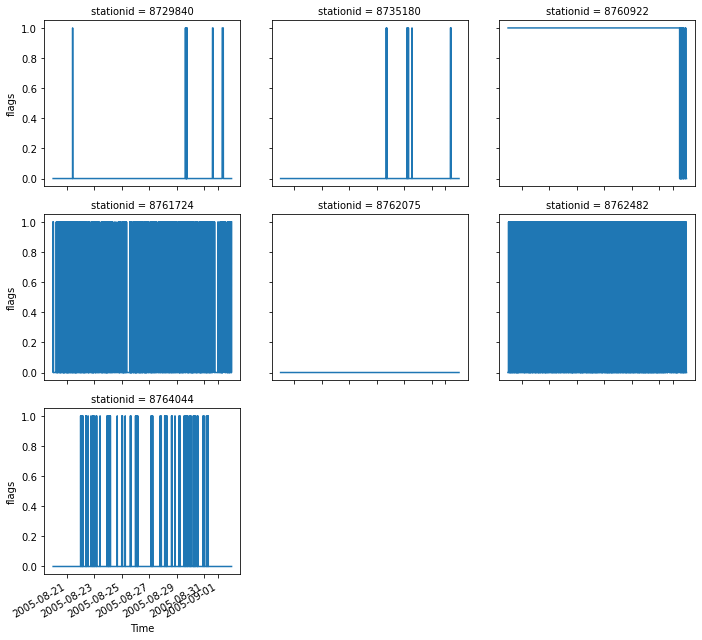

In [160]:
ds.flags.astype("int").plot.line(col="stationid", col_wrap=3)